#  Project Speed Dating


In [4]:
# prelude
import pandas as pd
from pandas.io.formats.info import DataFrameInfo
import seaborn as sns
import matplotlib.pyplot as plt
import shutil
import os
import requests

kCsvUrl     = 'https://full-stack-assets.s3.eu-west-3.amazonaws.com/M03-EDA/Speed+Dating+Data.csv'
kAssetsDir  = "/assets/"
kFileName   = "Speed_Dating_Data.csv"
kFileCopy   = "Speed_Dating_Data_Copy.csv"

# ratios for the graphs
kGold     = 1.618
kWidth    = 12
kHeight   = kWidth/kGold

# The dataset has many columns. 
pd.options.display.max_columns = None
# pd.options.display.max_rows = None

# <span style="color:red"><b>Idées En Vrac - To be commented</b></span>
* Sous chaque graphe mettre un paragraphe interprétation
* Refaire la table du 2.6
* Créer un environnment specific ?
* Préciser le github
 
* Facteurs de confusion
* ... 

<!-- 
RELIRE : 

https://medium.com/data-and-beyond/mastering-exploratory-data-analysis-eda-everything-you-need-to-know-7e3b48d63a95
https://medium.com/towardsdev/data-visualization-for-exploratory-data-analysis-eda-in-python-4e1b5b2fe91a


-->


# Executive Summary

À écrire à la toute fin

LoremLorem ipsum dolor sit amet, consectetur adipiscing elit. Mauris malesuada pellentesque lorem, nec congue ipsum sagittis et. Sed a consectetur velit. Cras nulla ipsum, vestibulum nec neque non, placerat cursus tellus. Vestibulum eu scelerisque velit. Proin hendrerit mauris ac nunc pellentesque, eget aliquam quam blandit. Praesent sit amet diam nisl. Nulla facilisi. Suspendisse porta tortor placerat hendrerit dictum. Pellentesque vel semper nunc. Sed blandit, diam ut ultrices mollis, leo orci elementum enim, ac ultrices lectus libero eu massa. Aliquam sit amet mauris consectetur, rutrum leo sit amet, rhoncus dui. Donec vitae congue sem.

Sed iaculis eget nulla at dictum. Integer eu massa eu tellus tincidunt bibendum a a sem. In vel pulvinar massa. Cras eu quam euismod elit dictum ultrices. Fusce sed ligula nec dolor molestie porta. Suspendisse dictum lorem sed nulla porttitor cursus. Praesent id lacinia nulla. Mauris nec diam vel sem lacinia elementum sit amet sit amet sem. Ut vel ante odio. Donec sit amet eros et justo mattis venenatis sed a nisl. Sed ac massa a erat sodales efficitur vel et leo. Pellentesque ac ipsum ligula.

# 1. Introduction

## Where are we in the process ?
<p align="center">
<img src="./assets/pipe.png" alt="drawing" width="800"/>
<p>

* We are at the very begining of the pipeline
* Everything happens as if we were right after the downlaod phase


## Objectives of this EDA
1. Read and understand the documentation
    * Keep track of the questions that came up while reading
    * Among others things, understand the process of data collection
    * Identify the target
    * ...
1. Identify the type of the data (quantity, data type...)
1. Identify the quality of the data (null values, duplicate, outliers...)
1. Identify the target
1. Plot the data in order to :
    * Illustrate some of the questions/ideas we may have while reading the documentation 
    * Gain more insights about the dataset
1. During this process, keep track of : 
    * the comments
    * the ideas
    * in order to document actions for further cleaning, analysis, investigations
1. At the end, come with some recommendations regarding what could be done (and why). This may include but this is not limited to :
  * Dropping some rows and columns
  * Rescale/standardize some of the values
  * Rework some of the data visualization
  * Design new features using some of the existing ones
  * ...   

### The objective of this EDA is <span style="color:red"><b>NOT</b></span>
1. To clean the data even if, as we will see, some quick'n easy data cleaning will take place here
1. To determine the weight of the differents features
1. Find or apply a model
1. ...

### Find below the plan of this notebook
2. Specifications
1. sdfsd
1. sdf

# 2. Specifications
* The company is experiencing a **decrease** in the number of **matches**
* They are trying to find a way to understand what makes people interested into each other.
* Use the dataset to understand what makes people interested into each other to go on a **second date** together


## 2.1 Principle of the speed dating as organised
<p align="center">
<img src="./assets/speed_dating.png" alt="drawing" width="600"/>
<p>

## 2.2 360° questionnaire
<p align="center">
<img src="./assets/process.png" alt="drawing" width="800"/>
<p>

## 2.3 Data collection phases
<p align="center">
<img src="./assets/data_collection.png" alt="drawing" width="800"/>
<p>


## 2.4 Open questions after reading the documentation
Most of the points below can be found in `02_EDA\Project_Speed_Dating\assets\Speed_Dating_Data_Description.docx`

<p align="center">
<img src="./assets/doc_comprehension.png" alt="drawing" width="600"/>
<p>


* Does the round (number of people met) have an impact (p2). If there is lot of participant is there an effect due to the length of the event ?
* Does position and positin1 have an impact (p2)
* Is there any correlation with the order number (p3)
* Is there any correlation with match (p3)
* Correlation with race (p3)
* Correlation with religion (p3). You can see the race. Religion might not be discussed and not so obvious to determine
* It seems like_o, prob_o ni met_o are not commented in the doc except in the array p 11
* Keep in minds they are students. Are they represenative of the customers ? Will it be possible to extrapolate from the results ?
* Do not use field. Use field_cd instead
* Is there any correlation with field_cd (p4)
* Is there any correlation with mn_sat (p4). Can we imagine this topi is discussed during the meeting ?
* Is there any correlation with undergrad (p4)
* How to make a cross analysis between races ?
* Check that the ones claiming race is important take date only with same race (p5)
* Check that the ones claiming race is important get matched only by people from the same race (p5)
* Same question for religion
* Is there any correlation with from (p5)
* Do not use zipcode
* Correlation with goal ? 
* Check if those who use to have date already get more dates than the others (p6)
* Correlation with go_out ? Let's see how this correlation compare with the correlation with date
* Correlation with carreer_coded p6 ? 
* Correlation with activities in common p6 ? We might think it is an easy topic to discuss 
* Correlation with exhappy p7 ? 
* Correlation with expnum p7 ? 
* How are ditributed results of : What are you looking for in the opposite sex p7 (attr1_1... waves 6-9 scale 0-10, while waves 1-5 and 10-21 distribute 100 pts)  
* How are ditributed results of : What you think most of your fellow men/women look for in the opposite sex p8 (attr4_1... waves 6-9 scale 0-10, while waves 1-5 and 10-21 distribute 100 pts)  
* How are ditributed results of : What do you think the opposite sex looks for in a date? p8 (attr2_1... waves 6-9 scale 0-10, while waves 1-5 and 10-21 distribute 100 pts)  
* How are ditributed results of : How do you think you measure up? p8 (attr3_1...)
* How are ditributed results of : How do you think others perceive you? p9 (attr5_1...)
* What is the value of match_es ? Can we design a new note. Ratio between the note he get and the estimate ?
* Watch results p12 (attr1_s and attr3_s...)
* Watch results p13 (satis_2, length, numdat_2)
* Watch results p13-15 (attrX_2)
* Is there any decay between data before the event (_1 and after the event _2) ?
* Is there any decay between data before the event (_1 or _2 and after the event _3) ?
* Watch results p16 (date_3, numdat_3...)
* Watch results p17-18 (attrX_3 ...)
* ...


## 2.5 Understanding the target

The target is the column `match` (p3 of `02_EDA\Project_Speed_Dating\assets\Speed_Dating_Data_Description.docx`)

<p align="center">
<img src="./assets/match.png" alt="drawing" width="600"/>
<p>

Indeed, as surprisingly explained only in the paragraph dedicated to `match_es` feature, a match happens, if and only if, both participants check the decidion box.

<p align="center">
<img src="./assets/match_explained.png" alt="drawing" width="600"/>
<p>

Finally, the `dec` field keep track of only one side of the equation.

<p align="center">
<img src="./assets/decision.png" alt="drawing" width="600"/>
<p>

The table below explains how it works :
1. Participant 1 met participants 11 ... 20 (line 1)
1. Participants 11 ... 20 all met participant 1 
1. Participant 1 want to meet participant 11 (dec == 1) but match == 0
1. Indeed when participant 11 met participant 1 he set dec to 0 (line 11)
1. Since only one of both participants set dec to 1 then match is set to 0 for both participants


<p align="center">
<img src="./assets/target_explained.png" alt="drawing" width="600"/>
<p>


# 2.6 Notes about this section

1. Time spent on the Word document : 4 + 4 + 1 = 9H
1. It is important to keep in mind that `dec` and `match` are higly correlated since `match = dec1 * dec2` 
    * `dec` could have been a good candidate but from the company point of view, what matters is the number of ``match`` (number of pairs of ``dec``) 
    * The worst case scenario would be an event with lot of ``dec`` set to one but no ``match`` 
1. Some of the features are still unclear
    * condtn : not explained
    * ...
1. We may decide to rename some of the features : 

| Old                   | New                       |
| :---------------      | -------------------------:|
| iid                   | uid (unique id)           |
| positin1              | start_position            | 
| pid                   | partner_uid               |
| field_cd              | field_code                |
| undergrd/undergra     | undergrade                |
| imprace               | important_race            |
| imprelig              | important_religion        |
| exphappy              | TO_BE_DEFINED             |
| expnum                | TO_BE_DEFINED             |
| dec                   | decision                  |
| attr                  | attractive                |
| sinc                  | sincere                   |
| intel                 | intelligent               |
| amb	                  | ambitious                 |
| shar                  | shared_interrest          |
| prob                  | ?????                     |
| met                   | already_met               |
| match_es              | match_estimation          |
| ...                   | ...                       |

<!-- To do so, one may use this statement `df.rename(columns={'old_name': 'new_name'}, inplace=True)` -->




# 3. Get the data from the cloud

* The file is available here : https://full-stack-assets.s3.eu-west-3.amazonaws.com/M03-EDA/Speed+Dating+Data.csv



In [5]:
with requests.Session() as s:
  download = s.get(kCsvUrl)

current_dir = os.path.abspath("")
filename_out = current_dir + kAssetsDir + kFileName
with open(filename_out, "wb") as f:
  f.write(download.content)

# df = pd.read_csv(filename_out, encoding='unicode_escape')
# display(df.sample(5))


## Notes about this section
1. Downloading the latest version of the file online helps to take into account latest update from marketing


# 4. Make a copy of the dataset

In [6]:
current_dir   = os.path.abspath("")
filename_in   = current_dir + kAssetsDir + kFileName
filename_out  = current_dir + kAssetsDir + kFileCopy

shutil.copyfile(filename_in, filename_out);

* The EDA is done with the copy of the data ("Speed_Dating_Data_Copy.csv").

In [7]:
df = pd.read_csv(filename_out, encoding='unicode_escape')
display(df.sample(5))

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
4088,276,4.0,1,8,2,11,21,10,10.0,9,15,266.0,0,0.52,1,28.0,2.0,25.0,20.0,20.0,25.0,0.0,10.0,0,4.0,6.0,7.0,5.0,4.0,1.0,4.0,6.0,2.0,26.0,Molecular Biology,10.0,UC Berkeley,"1,309.00","15,162.00",2.0,7.0,3.0,"New Hope, PA","18,977","80,608.00",2.0,4.0,1.0,Academia,2.0,6.0,2.0,8.0,9.0,8.0,9.0,2.0,3.0,6.0,9.0,1.0,4.0,7.0,6.0,7.0,2.0,2.0,4.0,NaN,24.0,16.0,28.0,14.0,8.0,10.0,25.0,13.0,11.0,23.0,13.0,15.0,25.0,18.0,11.0,18.0,23.0,5.0,7.0,6.0,7.0,10.0,8.0,5.0,6.0,9.0,6.0,7.0,1,9.0,9.0,6.0,5.0,4.0,3.0,7.0,2.0,0.0,9.0,25.0,15.0,15.0,20.0,5.0,20.0,7.0,8.0,9.0,7.0,7.0,6.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,15.0,20.0,20.0,5.0,15.0,25.0,10.0,10.0,25.0,15.0,15.0,25.0,15.0,15.0,20.0,20.0,5.0,7.0,6.0,8.0,7.0,8.0,6.0,5.0,7.0,7.0,5.0,1.0,1.0,1.0,1.0,NaN,25.0,15.0,25.0,15.0,5.0,15.0,25.0,15.0,20.0,20.0,5.0,15.0,30.0,10.0,15.0,20.0,5.0,20.0,20.0,20.0,10.0,15.0,20.0,15.0,8.0,8.0,9.0,7.0,8.0,7.0,8.0,9.0,6.0,7.0
8255,547,17.0,1,34,2,21,22,6,16.0,13,10,518.0,1,0.24,1,23.0,2.0,20.0,25.0,25.0,30.0,5.0,5.0,1,7.0,8.0,9.0,9.0,7.0,NaN,7.0,7.0,2.0,30.0,MBA - Private Equity / Real Estate,8.0,Oxford University,NaN,NaN,2.0,1.0,1.0,"Milan, Italy",NaN,NaN,2.0,3.0,1.0,Private Equity - Leveraged Buy-Outs,7.0,9.0,6.0,9.0,7.0,8.0,8.0,2.0,2.0,8.0,9.0,4.0,9.0,8.0,9.0,9.0,6.0,5.0,6.0,NaN,25.0,20.0,20.0,20.0,0.0,15.0,30.0,10.0,10.0,30.0,10.0,10.0,25.0,20.0,10.0,25.0,15.0,5.0,7.0,9.0,8.0,8.0,8.0,7.0,9.0,9.0,9.0,7.0,1,6.0,7.0,7.0,10.0,6.0,6.0,8.0,6.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3748,260,9.0,0,17,2,11,21,8,8.0,10,11,283.0,0,0.26,1,27.0,4.0,50.0,10.0,10.0,10.0,10.0,10.0,1,7.0,7.0,7.0,7.0,7.0,7.0,6.0,6.0,2.0,27.0,Genetics,10.0,Smith College,"1,260.00","24,742.00",4.0,4.0,4.0,"Malaysia, then Massachusetts","50,450",NaN,2.0,7.0,3.0,Scientist/educator,2.0,9.0,6.0,7.0,9.0,5.0,5.0,6.0,2.0,3.0,9.0,6.0,7.0,7.0,9.0,9.0,5.0,3.0,6.0,NaN,19.0,20.0,19.0,14.0,13.0,15.0,25.0,10.0,20.0,20.0,15.0,10.0,19.0,20.0,19.0,14.0,13.0,15.0,6.0,9.0,7.0,9.0,6.0,6.0,9.0,9.0,7.0,9.0,0,4.0,7.0,5.0,5.0,6.0,NaN,4.0,5.0,0.0,4.0,17.0,18.0,18.0,14.0,17.0,16.0,7.0,8.0,9.0,6.0,6.0,6.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,19.0,17.0,19.0,15.0,15.0,15.0,25.0,10.0,18.0,19.0,18.0,10.0,19.0,17.0,19.0,15.0,15.0,15.0,7.0,8.0,8.0,7.0,7.0,7.0,8.0,10.0,7.0,9.0,0.0,1.0,0.0,NaN,1.0,18.0,16

## 4.1 Renaming columns

In [8]:
# def rename_race(x:str):
#     match x:
#         case 1.0:
#             return "Black/African American"
#         case 2.0:
#             return "European/Caucasian-American"
#         case 3.0:
#             return "Latino/Hispanic American"
#         case 4.0:
#             return "Asian/Pacific Islander/Asian-American"
#         case 5.0:
#             return "Native American"
#         case 6.0:
#             return "Other"
        
# df["race"] = df["race"].apply(rename_race)
# df["race_o"] = df["race_o"].apply(rename_race)        

In [9]:
# Renaming sample code (see above)

# df.rename(columns={'dec': 'decision'}, inplace=True)
# display(df.sample(5))

# df.rename(columns={'iid': 'uid'}, inplace=True)
# df.rename(columns={'positin1': 'start_position'}, inplace=True)
# df.rename(columns={'pid': 'partner_uid'}, inplace=True)
# df.rename(columns={'field_cd': 'field_code'}, inplace=True)
# df.rename(columns={'undergra': 'undergrade'}, inplace=True)
# df.rename(columns={'imprace': 'important_race'}, inplace=True)
# df.rename(columns={'imprelig': 'important_religion'}, inplace=True)
# df.rename(columns={'exphappy': 'xpectation_happy'}, inplace=True)
# df.rename(columns={'expnum': 'xpectation_meet'}, inplace=True)
# df.rename(columns={'dec': 'decision'}, inplace=True)
# df.rename(columns={'id': 'id_in_wave'}, inplace=True)
# df.rename(columns={'idg': 'id_in_gender'}, inplace=True)
# df.rename(columns={'wave': 'wave_id'}, inplace=True)
# df.rename(columns={'samerace': 'same_race'}, inplace=True)
# df.rename(columns={'age_o': 'age_partner'}, inplace=True)
# df.rename(columns={'race_o': 'race_partner'}, inplace=True)


In [10]:

# ! NEED CODE REVIEW

# attr to attractive
# sinc to sincere
# intel to intelligent
# amb	to ambitious
# shar to shared_interrest

# for col in df.columns:
#     if "attr" in col.lower():
#         df.columns = df.columns.str.replace("attr$", "attractive", regex=True)
#     if "attr_" in col.lower():
#         df.columns = df.columns.str.replace("^attr", "attractive", regex=True)
    
#     if "sinc" in col.lower():
#         df.columns = df.columns.str.replace("sinc$", "sincere", regex=True)
#     if "sinc_" in col.lower():
#         df.columns = df.columns.str.replace("^sinc", "sincere", regex=True)
    
#     if "intel" in col.lower():
#         df.columns = df.columns.str.replace("intel$", "intelligent", regex=True)
#     if "intel_" in col.lower():
#         df.columns = df.columns.str.replace("^intel", "intelligent", regex=True)
    
#     # if "fun" in col.lower():
#     #   df.columns = df.columns.str.replace("fun", "fun")
    
#     if "amb" in col.lower():
#         df.columns = df.columns.str.replace("amb$", "ambitious", regex=True)
#     if "amb_" in col.lower():
#         df.columns = df.columns.str.replace("^amb", "ambitious", regex=True)    
    
#     if "shar" in col.lower():
#         df.columns = df.columns.str.replace("shar$", "shared_interests", regex=True)
#     if "shar_" in col.lower():
#         df.columns = df.columns.str.replace("^shar", "shared_interests", regex=True)    

## Notes about this section
1. We never know what can happen with the data file
1. Renaming may help to ease graph and table understanding 


# 5. What is the form factor of the dataset ?

In [11]:
df.shape

print(f"The dataset consist of :")
print(f"\t{len(df.shape):>6_} dimensions")
print(f"\t{df.shape[0]:>6_} observations (lines)")
print(f"\t{df.shape[1]:>6_} features (columns)")

The dataset consist of :
	     2 dimensions
	 8_378 observations (lines)
	   195 features (columns)


## Quick overview of the dataset

In [12]:
# df.head()
display(df.sample(10))

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
2150,157,16.0,0,31,2,7,16,16,16.0,4,15,172.0,0,0.36,0,27.0,2.0,17.78,17.78,22.22,20.0,15.56,6.67,1,8.0,5.0,7.0,8.0,9.0,6.0,8.0,4.0,1.0,28.0,"Business, marketing",8.0,NaN,NaN,NaN,4.0,5.0,3.0,Cleveland,"44,147","38,832.00",1.0,6.0,1.0,Brand Management,7.0,8.0,7.0,8.0,8.0,6.0,6.0,9.0,2.0,9.0,7.0,4.0,6.0,7.0,5.0,6.0,6.0,3.0,4.0,NaN,14.29,16.33,16.33,18.37,18.37,16.33,8.0,8.0,7.0,7.0,6.0,6.0,23.26,16.28,13.95,16.28,13.95,16.28,7.0,8.0,9.0,8.0,9.0,NaN,NaN,NaN,NaN,NaN,0,7.0,7.0,7.0,8.0,7.0,7.0,6.0,7.0,0.0,2.0,14.58,16.67,16.67,16.67,18.75,16.67,7.0,8.0,8.0,9.0,9.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,14.58,16.67,16.67,18.75,18.75,14.58,8.0,8.0,8.0,7.0,7.0,8.0,21.95,14.63,14.63,17.07,14.63,17.07,7.0,8.0,8.0,9.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3574,252,1.0,0,1,2,11,21,18,18.0,18,5,277.0,0,-0.11,0,25.0,2.0,60.00,20.00,0.00,20.0,0.00,0.00,0,6.0,8.0,7.0,6.0,NaN,NaN,6.0,1.0,2.0,28.0,Political Science,13.0,Universidad Iberoamericana,NaN,NaN,3.0,1.0,1.0,Mexico,"11,910",NaN,1.0,6.0,2.0,Professor,2.0,4.0,3.0,3.0,8.0,7.0,6.0,7.0,4.0,9.0,9.0,2.0,9.0,9.0,9.0,9.0,9.0,2.0,10.0,NaN,0.00,25.00,25.00,25.00,25.00,0.00,30.0,20.0,10.0,30.0,0.0,10.0,20.00,5.00,20.00,20.00,20.00,15.00,9.0,9.0,9.0,9.0,10.0,9.0,10.0,8.0,7.0,7.0,0,2.0,1.0,1.0,1.0,9.0,5.0,1.0,2.0,0.0,2.0,10.00,20.00,20.00,20.00,20.00,10.00,8.0,8.0,8.0,10.0,9.0,4.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,10.00,20.00,20.00,20.00,20.00,10.00,40.0,10.0,10.0,10.0,10.0,20.0,40.00,10.00,10.00,10.00,10.00,20.00,8.0,9.0,8.0,9.0,8.0,8.0,8.0,8.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8209,545,15.0,1,30,2,21,22,18,19.0,22,8,516.0,0,-0.18,0,27.0,4.0,58.00,5.00,8.00,10.0,7.00,12.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,Biomedical Informatics,5.0,Columbia,"1,430.00","26,908.00",2.0,7.0,1.0,New York City,"10,027","16,767.00",1.0,7.0,2.0,Doctor,4.0,10.0,2.0,2.0,5.0,5.0,4.0,7.0,5.0,4.0,7.0,4.0,3.0,4.0,5.0,5.0,2.0,1.0,6.0,NaN,20.00,20.00,20.00,20.00,10.00,10.00,50.0,10.0,10.0,20.0,5.0,5.0,20.00,20.00,10.00,20.00,25.00,5.00,8.0,8.0,8.0,9.0,6.0,8.0,5.0,7.0,9.0,2.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,3.0,35.0,5.0,20.0,20.0,5.0,15.0,20.00,15.00,20.00,15.00,15.00,15.00,20.0,20.0,15.0,15.0,15.0,15.0,10.00,20.00,10.00,20.00,30.00,10.00,9.0,7.0,9.0,8.0,7.0,9.0,5.0,7.0,9.0,6.0,1.0,

## Notes about this section

1. According the documentation (p10 of ./assets/Speed_Dating_Data_Description.docx)
1. The target is the column `match` (index 12)

# 6. Which types of data is included in the dataset ?

The types included can be listed with the code below

In [13]:
# df.info(verbose=True) 
df_types = df.dtypes
df_types

iid           int64
id          float64
gender        int64
idg           int64
condtn        int64
             ...   
attr5_3     float64
sinc5_3     float64
intel5_3    float64
fun5_3      float64
amb5_3      float64
Length: 195, dtype: object

A summary of the types available in the dataset can be established with the code below 

In [14]:
count_types = df_types.value_counts()
print(count_types)

float64    174
int64       13
object       8
Name: count, dtype: int64


## Notes about this section
1. NA


# 7. What about the variables of type int64 ?


Here is the list of 13 features of type int 

In [15]:
df_types.loc[df_types=='int64']

iid         int64
gender      int64
idg         int64
condtn      int64
wave        int64
round       int64
position    int64
order       int64
partner     int64
match       int64
samerace    int64
dec_o       int64
dec         int64
dtype: object

## Notes about this section
1. At this point, most of the int features seems to be OK for this EDA
1. Should we transform as int some of the xxx_attr columns ?
    * The code to be used would look like : ```df['colonne_float'] = df['colonne_float'].astype(int)```
    * After verification (use the Overview above) this is NOT a good idea. 
    * Look at pf_o_att	pf_o_sin	pf_o_int	pf_o_fun	pf_o_amb	pf_o_sha. 
    * Some values have 2 digits and have been rescaled to sum up to 100.

# 8. What about the features of type float64 ?

  * 90% ($\frac{174}{195}$) of the columns are float
  * many of the `attr_XXX` are considered float (pf_o_attr, attr1_1...) 

In [16]:
df_types.loc[df_types=='float'].head(15)

id          float64
positin1    float64
pid         float64
int_corr    float64
age_o       float64
race_o      float64
pf_o_att    float64
pf_o_sin    float64
pf_o_int    float64
pf_o_fun    float64
pf_o_amb    float64
pf_o_sha    float64
attr_o      float64
sinc_o      float64
intel_o     float64
dtype: object

The features below should be converted to int64 :
* `id`
* `positin1` 
* `age_o` 
* `race_o` 

## Converting `id` to int64

In [17]:
# Make sure there is not NaN in the columns in order to be able to make the cast
count = df["id"].isna().sum()
if (count!=0):
  print(f"{count} lines will be deleted because the id is empty") 

df = df.dropna(subset=['id'])
df['id'] = df['id'].astype(int)

1 lines will be deleted because the id is empty


## Converting other features

In [18]:
print(f"Number of lines impacted : ")
      
print(f"\tpositin1 {df['positin1'].isna().sum():>6_} lines")
print(f"\tage_o    {df['age_o'].isna().sum():>6_} lines")
print(f"\trace_o   {df['race_o'].isna().sum():>6_} lines")



Number of lines impacted : 
	positin1  1_846 lines
	age_o       104 lines
	race_o       73 lines


* The convertion in not done yet
* The code is similar to the one used for `id`
* The conversion will be done if needed by the EDA

In [19]:
display (df.sample(5))

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
1556,106,13,1,26,2,4,18,13,NaN,11,9,84.0,0,-0.06,1,32.0,3.0,30.0,30.0,30.0,5.0,0.0,5.0,0,4.0,6.0,8.0,6.0,5.0,5.0,5.0,4.0,2.0,22.0,Law,1.0,NaN,NaN,NaN,3.0,1.0,3.0,Texas,"76,513","23,361.00",5.0,7.0,3.0,Law,1.0,2.0,4.0,2.0,9.0,6.0,5.0,4.0,9.0,2.0,9.0,8.0,7.0,9.0,2.0,8.0,5.0,3.0,5.0,2.0,10.0,20.0,35.0,10.0,5.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0,15.0,20.0,20.0,5.0,20.0,4.0,7.0,3.0,9.0,2.0,NaN,NaN,NaN,NaN,NaN,1,10.0,10.0,10.0,8.0,8.0,8.0,10.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,15.0,30.0,30.0,10.0,5.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,9.0,9.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,NaN,NaN,20.0,20.0,35.0,5.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,7.0,9.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN
7036,476,11,0,21,2,19,15,14,15.0,4,11,491.0,0,0.60,0,29.0,3.0,30.0,10.0,25.0,20.0,8.0,7.0,0,5.0,6.0,6.0,7.0,6.0,6.0,5.0,5.0,2.0,25.0,SIPA-International Affairs,13.0,UC Santa Cruz,"1,149.00","15,004.00",2.0,1.0,3.0,California,"94,933","40,163.00",5.0,5.0,2.0,International Development,9.0,4.0,1.0,7.0,9.0,5.0,5.0,4.0,1.0,7.0,3.0,3.0,3.0,3.0,3.0,7.0,6.0,3.0,5.0,NaN,20.0,20.0,20.0,15.0,15.0,10.0,30.0,10.0,10.0,20.0,10.0,20.0,50.0,5.0,5.0,30.0,5.0,5.0,7.0,9.0,5.0,7.0,6.0,7.0,5.0,7.0,7.0,8.0,0,9.0,5.0,7.0,8.0,6.0,6.0,6.0,5.0,0.0,2.0,9.0,9.0,9.0,7.0,7.0,6.0,7.0,8.0,8.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,NaN,NaN,30.0,20.0,20.0,10.0,10.0,10.0,50.0,30.0,10.0,10.0,0.0,0.0,40.0,5.0,5.0,10.0,30.0,10.0,50.0,0.0,0.0,40.0,0.0,10.0,8.0,8.0,8.0,8.0,9.0,7.0,8.0,7.0,8.0,7.0
5101,345,5,0,9,2,14,18,17,17.0,4,6,366.0,1,0.19,1,27.0,2.0,14.0,18.0,17.0,16.0,15.0,20.0,1,6.0,6.0,6.0,5.0,5.0,5.0,7.0,7.0,2.0,24.0,Nutrition,10.0,Biological Sciences,NaN,NaN,2.0,7.0,6.0,Brooklyn,"11,235","25,401.00",2.0,7.0,4.0,Nutritionist,4.0,5.0,1.0,10.0,6.0,5.0,5.0,3.0,4.0,8.0,9.0,6.0,7.0,7.0,8.0,9.0,6.0,9.0,6.0,NaN,10.0,20.0,27.0,23.0,15.0,5.0,50.0,0.0,5.0,20.0,5.0,20.0,35.0,10.0,10.0,25.0,10.0,10.0,7.0,9.0,7.0,9.0,7.0,6.0,10.0,10.0,7.0,10.0,1,9.0,10.0,10.0,6.0,9.0,8.0,9.0,6.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,15.0,15.0,25.0,30.0,10.0,5.0,25.0,10.0,10.0,10.0,35.0,10.0,45.0,2.0,13.0,25.0,3.0,12.0,7.0,9.0,9.0,7.0,7.0,6.0,10.0,9.0,6.0,9.0,0.0,1.0,0.0,NaN,NaN,10.0,10.0,30.0,30.0,10.0,0.0,50.0,5.0,10.0,20.0,10.0,5.0,50.0,10.0,10.0,10.0,10.0,10.0,60.0,10.0,10.0,10.0,5.0,5.0,7.0,9.


## Notes about this section
1. blabla

# 9. What about the features of type object ?

The list of 8 columns of type object 

In [20]:
df_types.loc[df_types=='object']

field       object
undergra    object
mn_sat      object
tuition     object
from        object
zipcode     object
income      object
career      object
dtype: object

In [21]:
df_discrete = df.select_dtypes(include=['object'])
df_discrete.describe()

,field,undergra,mn_sat,tuition,from,zipcode,income,career
count,8314,4913,3133,3583,8298,7313,4279,8288
unique,259,241,68,115,269,409,261,367
top,Business,UC Berkeley,"1,400.00","26,908.00",New York,0,"55,080.00",Finance
freq,521,107,403,241,522,355,124,202


In [22]:
# display(df_discrete.head())
# display(df_discrete.tail())
display (df_discrete.sample(5))

,field,undergra,mn_sat,tuition,from,zipcode,income,career
4008,Social Work,PACE University,"1,030.00","17,030.00",New York,"11,235","25,401.00",Social Work
609,Finance,NaN,NaN,NaN,Switzerland,"10,012",NaN,banker / academia
1067,Operations Research (SEAS),NaN,NaN,NaN,India/Venezuela,"8,003",NaN,Operations Research
3546,Finance,Universidad Catolica de Chile,NaN,NaN,Chile,NaN,NaN,Wall Street Economist
1977,Business,NaN,NaN,NaN,New York,"10,014","41,831.00",Business


In [23]:
df['mn_sat'] = df['mn_sat'].str.replace(',', '').astype(float)
df['income'] = df['income'].str.replace(',', '').astype(float)
df['tuition'] = df['tuition'].str.replace(',', '').astype(float)

df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521",69487.0,2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521",69487.0,2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521",69487.0,2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,2

## Notes about this section

1. ```mn_sat``` should be casted as float (see below)
1. ```tuition``` should be casted as float (see below)
1. ```income``` could/should be casted as float (see below)
1. ```zipcode``` should NOT be used since its content is very unreliable
    * Not only for countries other thant US but also because it seems to be a mixt of zip code AND area code (separated by a coma)
    * https://ca.postcodebase.com/fr/city/san%20francisco

# 10. What about duplicate ?

In [24]:
df.duplicated().sum()

0

## Notes about this section
* No observations are duplicated
* The to use would be : `df = df.drop_duplicates()`

# 11. What about empty cells ?

In [25]:
print(f"Total # of cells = {df.shape[0]*df.shape[1]:>12_.2f}")

empty_cells = df.isna().sum().sum()
print(f"# of empty cells = {empty_cells:>12_.2f}")

percent_empty_cells = (100*df.isna().sum().sum()/(df.shape[0]*df.shape[1])).round(2)
print()
print(f"{percent_empty_cells:>.2f} % of the cells are empty")

df_tmp = pd.DataFrame(df.isna().sum().sort_values(ascending=False))
df_tmp = df_tmp.cumsum()

percent_80 = empty_cells*80/100
bob = df_tmp.loc[df_tmp[0]<=percent_80]
print()
print(f"80% of the empty cells come from {100*len(bob)/df.shape[1]:.2f}% the features ({len(bob)} features over {df.shape[1]})")

Total # of cells = 1_633_515.00
# of empty cells =   431_999.00

26.45 % of the cells are empty

80% of the empty cells come from 33.85% the features (66 features over 195)


## % of empty cells in the target

Which percentage of the target is empty ?

In [26]:
df["match"].isna().sum()

0

We would have had to remove the corresponding lines

## % of empty cells per feature


Where are the missing values ?

In [27]:
df_empty = pd.DataFrame((df.isna().sum() / len(df) * 100).sort_values(ascending=False).round(2))
df_empty.head(20)

,0
num_in_3,92.04
numdat_3,82.14
expnum,78.51
sinc7_2,76.67
amb7_2,76.67
shar7_2,76.45
attr7_2,76.33
intel7_2,76.33
fun7_2,76.33
amb5_3,75.95


Features with largest number of missing values comes from the forms filled : 
* One day after the Event (_2) 
* 3 weeks after the event (_3)

* Let's keep in mind ``expnum`` is empty at 78%.
    * ``expnum`` : Out of the 20 people you will meet, how many do you expect will be interested in dating you?



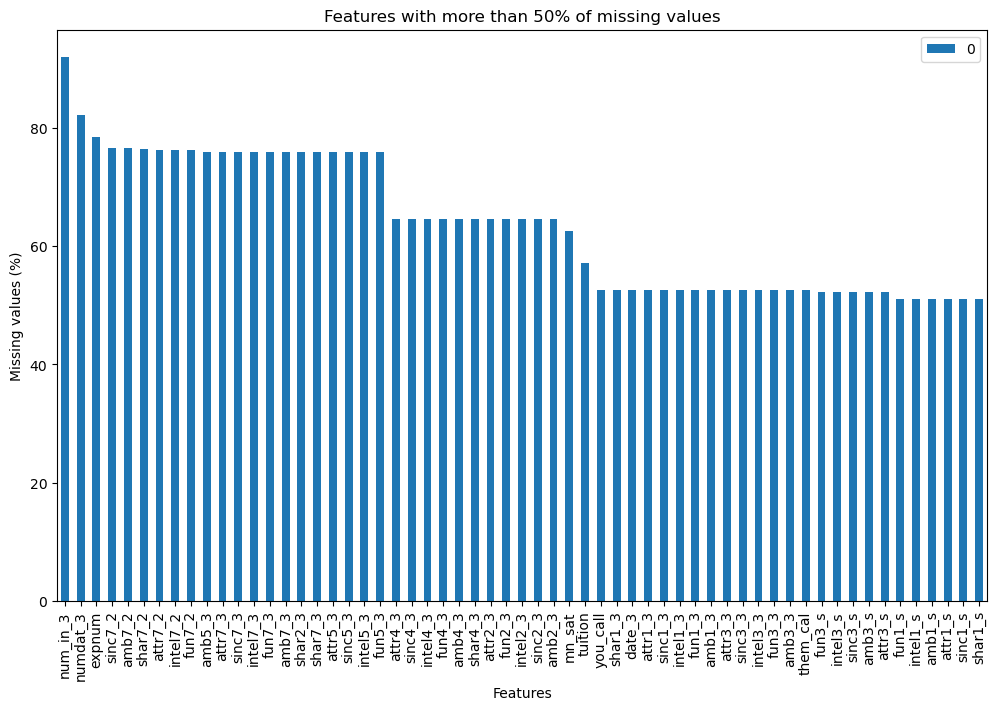

In [28]:
df_most_empty = df_empty[df_empty[0]>50]
df_most_empty.plot(
    kind="bar", 
    figsize=(kWidth, kHeight),
    title="Features with more than 50% of missing values",
    xlabel="Features",
    ylabel="Missing values (%)",
  );


In [29]:
df_most_empty.columns

RangeIndex(start=0, stop=1, step=1)

ValueError: Could not interpret value `0` for `x`. An entry with this name does not appear in `data`.

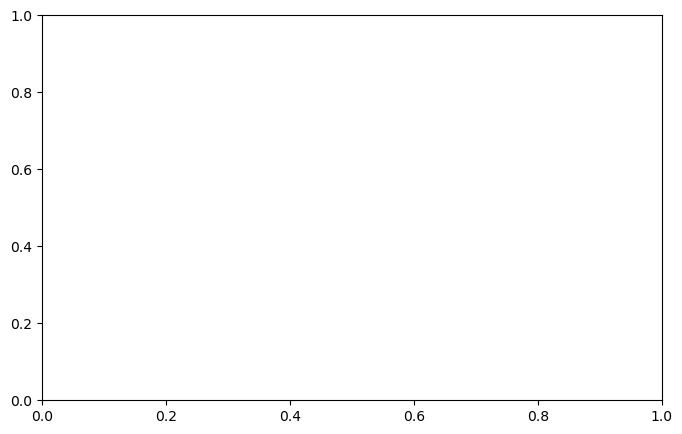

In [30]:
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot (df_most_empty, x="0", y=1,palette="coolwarm")              # tips, the dataframe as first param
                                                                                # viridis comes from matplotlib. Default estimator = mean
                                                                                # hue="day" sinon y a un warning

# x="day", y="tip", 
# , hue="day"
# ax.set_title("Mean of Tips by Day of the Week")
# plt.savefig('mean_of_tips_by_day_of_week.png')

* _3, _2 and _s have more thant 50% of missing data
* Should we take them into account ?
* What can we expect when more than 50% of the observations are missing ?

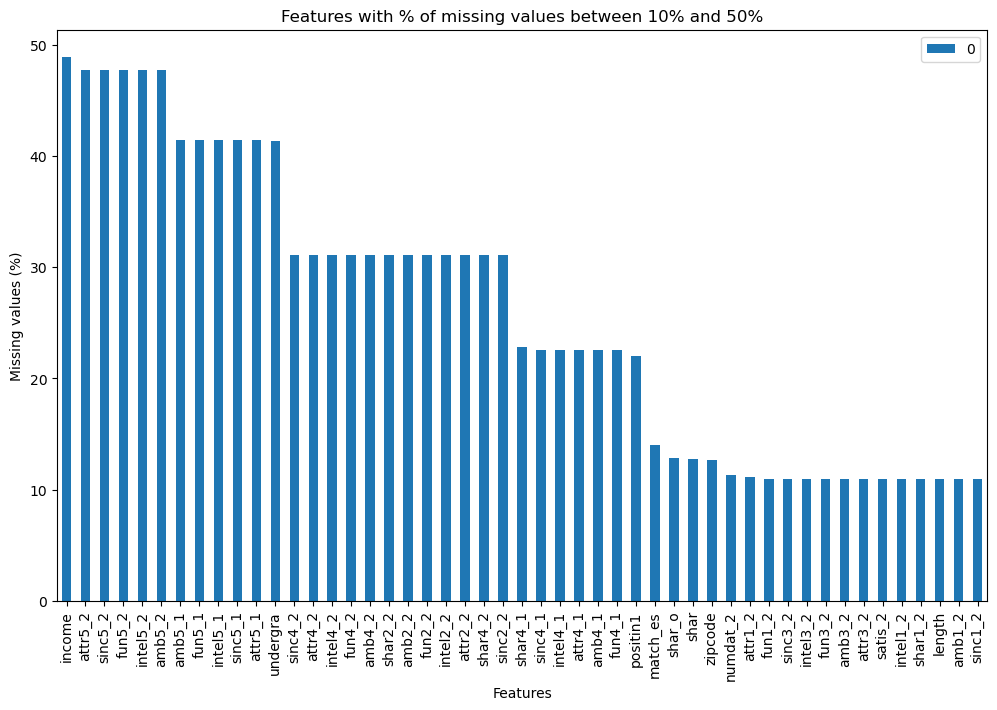

In [31]:
df_most_empty = df_empty[(df_empty[0]>10) & (df_empty[0]<=50)]
df_most_empty.plot(
    kind="bar", 
    figsize=(kWidth, kHeight),
    title="Features with % of missing values between 10% and 50%",
    xlabel="Features",
    ylabel="Missing values (%)",
  );


If we keep features were less than 10% of the data are missing...

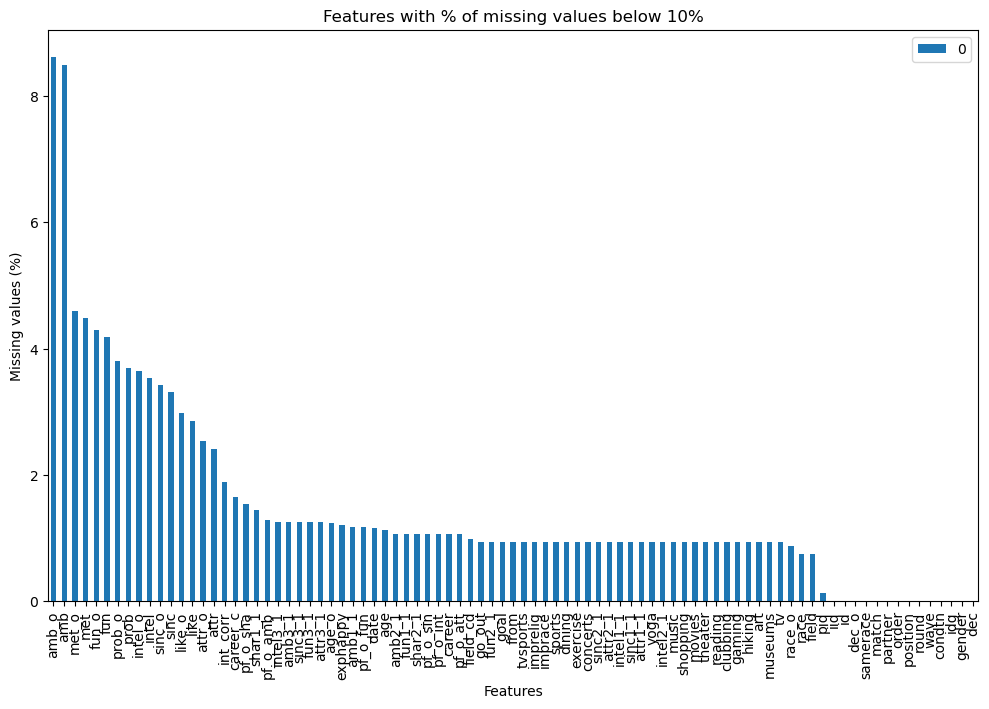

In [32]:
df_most_empty = df_empty[(df_empty[0]<=10) ]
df_most_empty.plot(
    kind="bar", 
    figsize=(kWidth, kHeight),
    title="Features with % of missing values below 10%",
    xlabel="Features",
    ylabel="Missing values (%)",
  );


Features with the smallest number of missing values comes from the forms filled : 
* Before the Event (_1) 

We will need to either : 
* only take into account data before the event (_1)
* remove features of type _2, _3, _s
* split the analysis to differenciate results from data before the event and results from data during or after the event 
* Is it reasonnable to take into account features when more than 20% of the samples are empty ?


## What about the spread of empty cells among the dataset ?

This is just another way to observe the missing values.

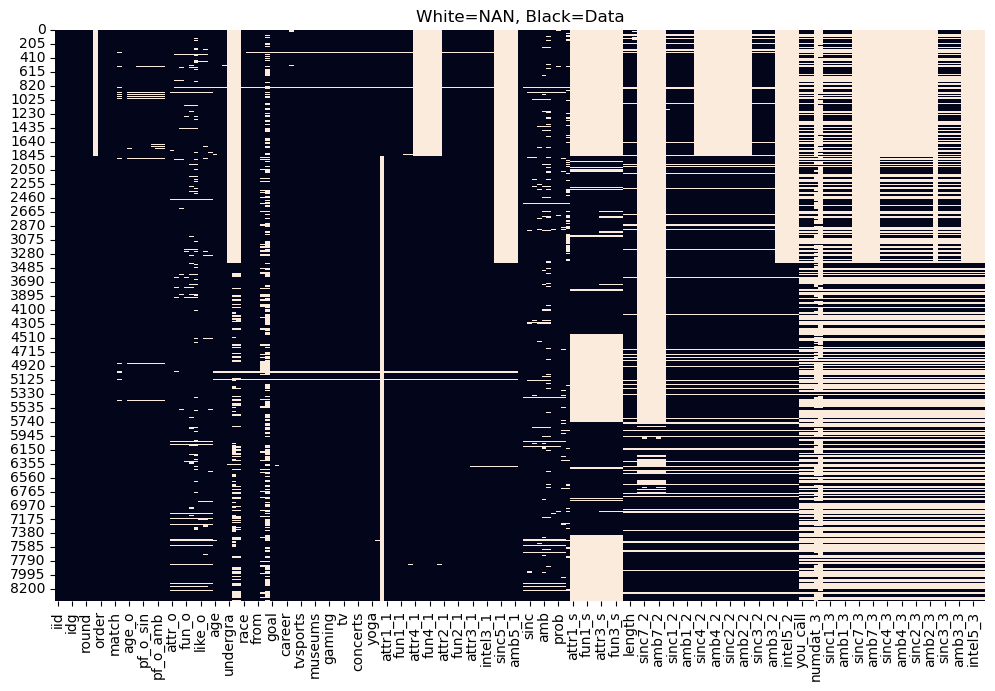

In [33]:
plt.figure(figsize=(kWidth, kHeight))
plt.title("White=NAN, Black=Data")
_ = sns.heatmap(df.isna(), cbar=False)

## Notes about this section
1. At this point of the EDA, we know that 26% of the values are missing globally
1. We decide to continue with them
1. If needed we will remove some of the observation or replace some value if needed.


# Droping features

In [34]:
columns_to_keep = df.filter(regex='^(?!.*(_s|_2|_3)$).').columns
df = df[columns_to_keep]

# This will ease the graphes and tables
df['match'] = df['match'].replace({1: 'yes', 0: 'no'})
df.shape


(8377, 111)

In [35]:
df.sample(10)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,length,you_call,them_cal
6080,396,18,0,35,2,15,19,6,6.0,16,14,410.0,no,-0.41,0,27.0,2.0,20.00,20.00,20.00,20.00,10.00,10.00,0,3.0,4.0,3.0,2.0,3.0,1.0,2.0,4.0,2.0,25.0,Theatre Management & Producing,15.0,Occidental College,1011.0,9729.0,4.0,1.0,5.0,Hawaii and Los Angeles,"96,701",50501.0,2.0,7.0,2.0,producer at a non-profit regional theatre,6.0,3.0,8.0,7.0,10.0,10.0,10.0,7.0,7.0,7.0,10.0,9.0,10.0,10.0,10.0,10.0,7.0,7.0,4.0,NaN,15.00,18.00,18.00,18.00,15.00,16.00,16.0,15.0,18.0,18.0,18.0,15.0,20.00,15.00,15.00,18.00,14.00,18.00,8.0,10.0,10.0,10.0,8.0,8.0,10.0,10.0,10.0,9.0,1,8.0,9.0,9.0,8.0,8.0,5.0,8.0,3.0,2.0,3.0,1.0,NaN,NaN
8360,552,22,1,44,2,21,22,22,10.0,13,5,513.0,yes,0.55,1,23.0,2.0,20.00,20.00,20.00,20.00,5.00,15.00,1,7.0,6.0,7.0,7.0,6.0,6.0,7.0,5.0,2.0,25.0,Climate Dynamics,18.0,"Ecole Normale Suprieure, Paris",NaN,NaN,2.0,1.0,1.0,France,"78,110",NaN,1.0,2.0,1.0,assistant master of the universe (otherwise it...,15.0,8.0,2.0,5.0,10.0,10.0,10.0,7.0,1.0,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0,10.0,NaN,70.00,0.00,15.00,15.00,0.00,0.00,90.0,0.0,0.0,0.0,0.0,10.0,50.00,0.00,0.00,30.00,0.00,20.00,8.0,7.0,6.0,7.0,7.0,9.0,7.0,10.0,5.0,9.0,1,8.0,9.0,9.0,9.0,6.0,8.0,9.0,6.0,NaN,3.0,1.0,2.0,0.0
5854,384,6,0,11,2,15,19,16,16.0,15,16,412.0,yes,0.14,1,27.0,2.0,75.00,5.00,5.00,5.00,5.00,5.00,1,8.0,8.0,8.0,7.0,8.0,8.0,8.0,8.0,2.0,23.0,Education,9.0,Bowdoin College,1370.0,25890.0,2.0,9.0,6.0,Connecticut,"6,019",NaN,2.0,5.0,3.0,Undecided,10.0,8.0,5.0,7.0,9.0,10.0,10.0,3.0,3.0,7.0,6.0,7.0,10.0,10.0,5.0,6.0,6.0,3.0,8.0,NaN,20.00,20.00,20.00,20.00,20.00,0.00,25.0,15.0,15.0,10.0,20.0,15.0,20.00,20.00,10.00,20.00,20.00,10.00,8.0,8.0,9.0,8.0,9.0,7.0,8.0,8.0,10.0,10.0,1,8.0,10.0,10.0,10.0,10.0,7.0,7.0,8.0,2.0,10.0,1.0,0.0,1.0
2648,196,3,0,5,2,9,20,5,5.0,1,1,214.0,yes,0.00,0,23.0,2.0,17.02,21.28,17.02,21.28,14.89,8.51,1,7.0,8.0,8.0,7.0,9.0,5.0,6.0,6.0,2.0,25.0,"Religion, GSAS",7.0,NaN,NaN,NaN,4.0,1.0,6.0,"Taipei, Taiwan",NaN,NaN,1.0,1.0,1.0,education,2.0,3.0,3.0,6.0,7.0,7.0,7.0,8.0,6.0,8.0,6.0,8.0,9.0,9.0,9.0,9.0,7.0,9.0,6.0,NaN,17.65,17.65,17.65,15.69,15.69,15.69,8.0,8.0,7.0,7.0,7.0,7.0,18.75,18.75,16.67,16.67,14.58,14.58,9.0,9.0,9.0,9.0,9.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,7.0,9.0,8.0,5.0,6.0,5.0,1.0,NaN,3.0,NaN,NaN
6697,443,4,1,8,2,17,11,3,10.0,5,4,433.0,no,0.20,0,30.0,6.0,20.00,20.00,20.00,20.00,10.00,10.00,1,7.0,6.0,6.0,6.0,4.0,4.0,8.0,7.0,2.0,27.0,International Affairs - Economic Policy,13.0,Univeristy of Michigan,1290.0,21645.0,3.0,1.0,3.0,New York,"17,403",27794.0,2.0,6.0,2.0,Economic Policy Advisor on Latin America,9.0,9.0,5.0,7.0,8.0,5.0,5.0,5.0,3.0,7.0,6.0,1.0,6.0,7.0,8.0,8.0,4.0,5.0,7.0,NaN,30.00,25.00,10.00,20.00,0.00,15.00,40.0,10.0,10.0,30.0,0.0,10.0,40.00,0.00,20.00,20.00,20.00,0.00,7.0,10.0,9.0,7.0,7.0,7.0,8.0,8.0,10.0,9.0,0,5.0,5.0,7.0,7.0,4.0,2.0,5.0,6.0,2.0,3.0,1.0,NaN,NaN
151,16,6,1,12,1,1,10,3,NaN,2,2,2.0,no,0.73,1,24.0,2.0,45.00,5.00,25.00,20.00,0.00,5.00,0,8.0,7.0,8.0,3.0,6.0,2.0,6.0,5.0,2.0,25.0,Business,8.0,NaN,NaN,NaN,2.0,9.0,2.0,Milan - Italy,"26,900",NaN,1.0,5.0,1.0,research/financial industry,7.0,7.0,2.0,6.0,7.0,7.0,7.0,5.0,5.0,5.0,8.0,3.0,7.0,8.0,7.0,8.0,6.0,1.0,7.0,10.0,50.00,0.00,30.00,10.00,0.00,10.00,NaN,NaN,NaN,NaN,NaN,NaN,50.00,5.00,30.00,5.00,5.00,5.00,6.0,6.0,8.0,8.0

In [36]:
df_empty = pd.DataFrame((df.isna().sum() / len(df) * 100).sort_values(ascending=False).round(2))
df_empty.head(20)

,0
expnum,78.51
mn_sat,62.60
tuition,57.23
them_cal,52.57
you_call,52.57
income,48.92
sinc5_1,41.45
fun5_1,41.45
intel5_1,41.45
attr5_1,41.45


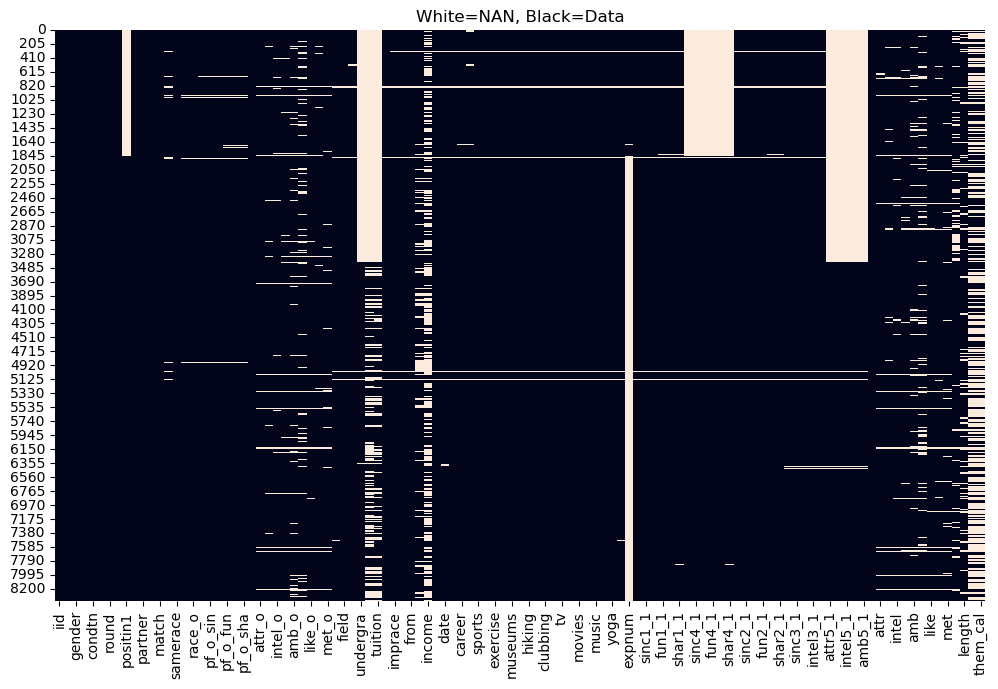

In [37]:
plt.figure(figsize=(kWidth, kHeight))
plt.title("White=NAN, Black=Data")
_ = sns.heatmap(df.isna(), cbar=False)

* At this point there are 

# Matches

## The race does'nt matter

In [38]:
df.groupby('match')['samerace'].value_counts()

match  samerace
no     0           4247
       1           2750
yes    0            814
       1            566
Name: count, dtype: int64

* No. Indeed among thoses who got a match 41% ($\frac{566}{566+814}$) had the same race

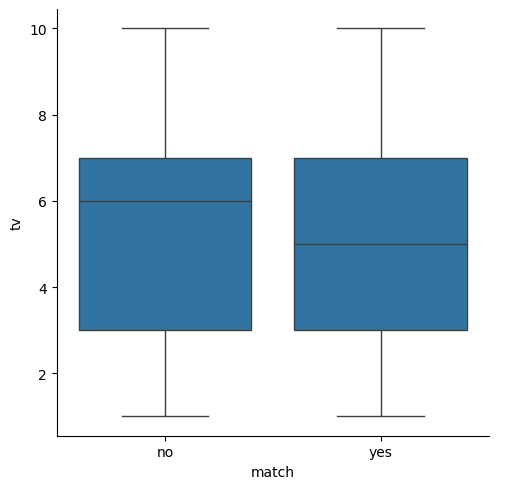

In [39]:
_ = sns.catplot(x="match", y="tv", kind="box", data=df)

# Outliers
# Data visualization
# Correlation between variables
# Any transformation that would help
# Should we add external ressources ?
# Any risk of confusion factor ?
# Summary

# Question qui étaient posées
1. What are the least desirable attributes in a male partner? Does this differ for female partners?
1. How important do people think attractiveness is in potential mate selection vs. its real impact?
1. Are shared interests more important than a shared racial background?
1. Can people accurately predict their own perceived value in the dating market?
1. In terms of getting a second date, is it better to be someone's first speed date of the night or their last?

Text(0.5, 0.98, 'Matrice de corrélation')

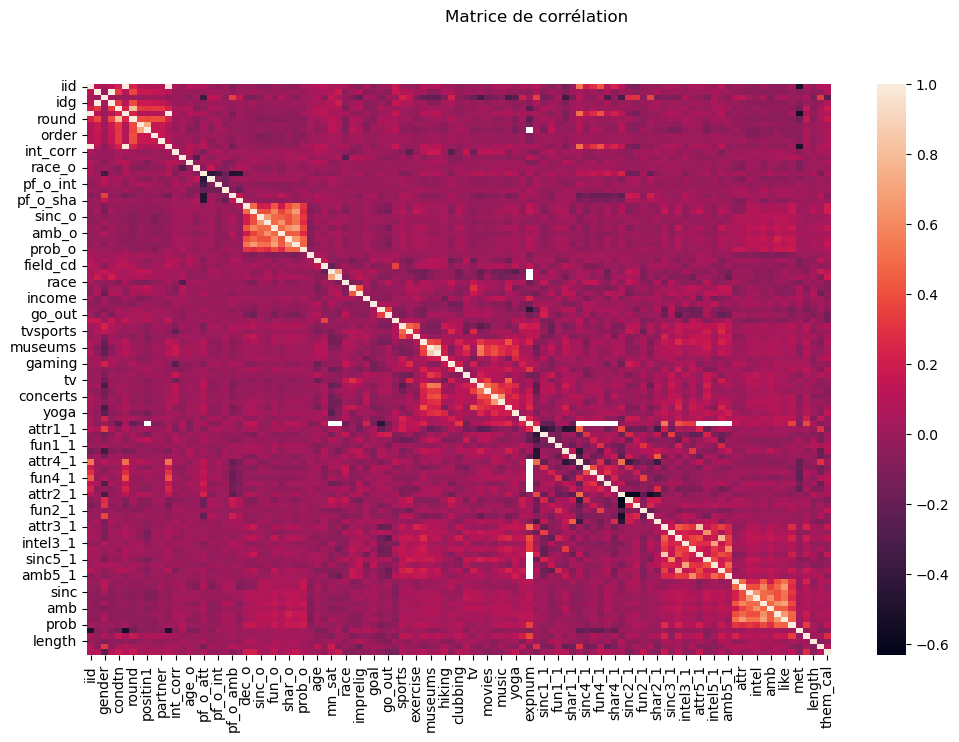

In [62]:
corr = df.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(kWidth,kHeight))
sns.heatmap(corr)
plt.suptitle("Matrice de corrélation")


## 1. What are the least desirable attributes in a male partner? Does this differ for female partners?

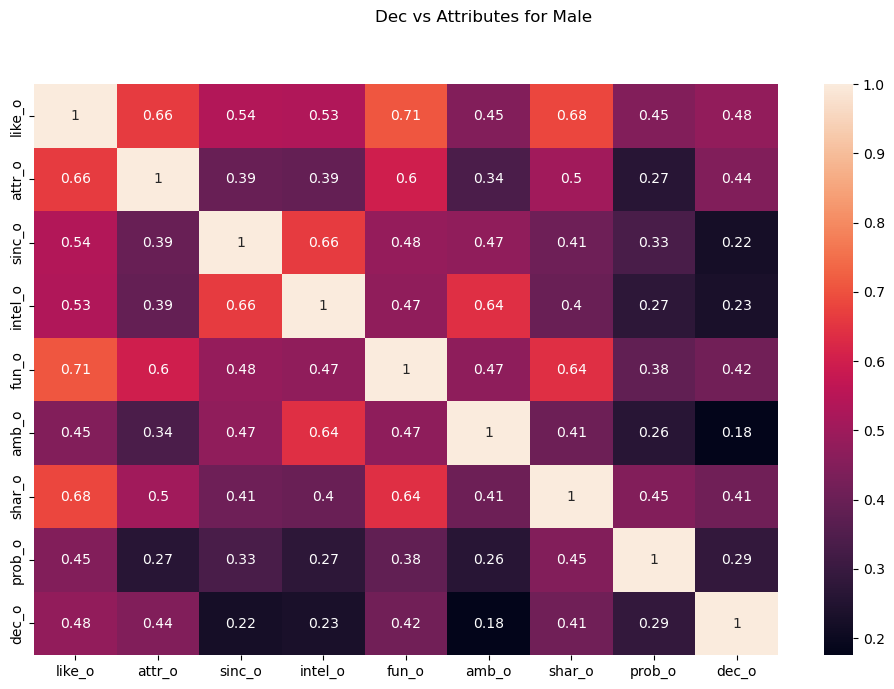

In [75]:
df_male     = df.loc[df.gender == 1, :]
df_female   = df.loc[df.gender == 0, :]

attributes = ["like_o", "attr_o", "sinc_o", "intel_o", "fun_o", "amb_o", "shar_o", "prob_o", "dec_o"]

df_attr_for_male = df_male[attributes]

fig, ax = plt.subplots(figsize=(kWidth,kHeight))
sns.heatmap(df_attr_for_male.corr(),annot=True)
plt.suptitle('Dec vs Attributes for Male');

### Reminder
* like = Overall, how much do you like this person?
* attr = Attractive
* sinc = Sincere
* intel = intelligent
* fun = Fun
* amb = Ambitious
* shar = Shared Interests/Hobbies
* prob = How probable do you think it is that this person will say 'yes' for you?

If we look a de columns on the right hand side

If we except `like` and `attr` attributes, the 2 most important attributes for a men are `fun` when checking `dec` are `fun` then `shar`. We observe the same thing with female. See below.

For men, the 2 least important attributes are `sinc` and `amb`. Here too, they are the same for women but un reversed order. 


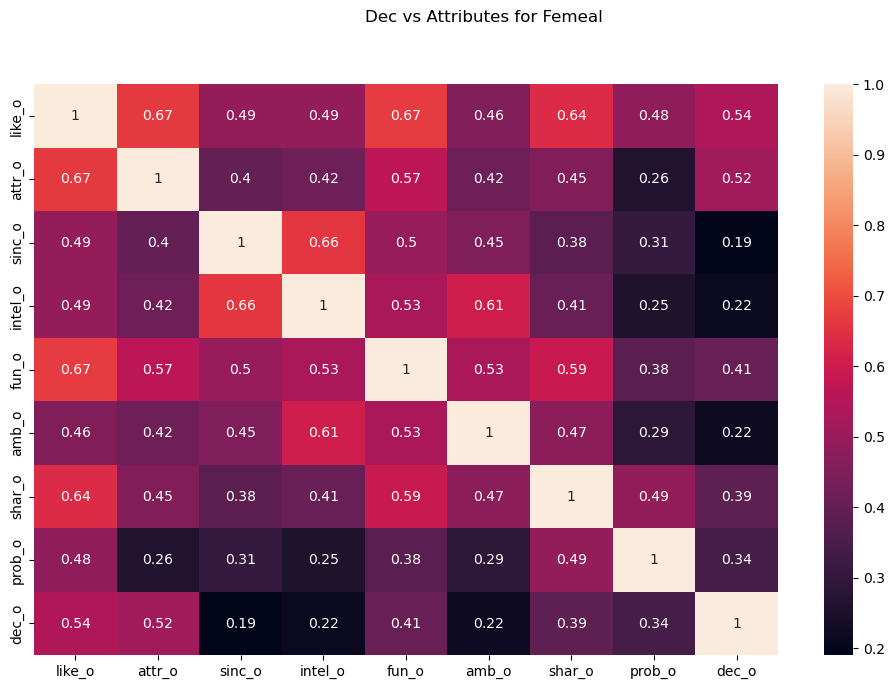

In [77]:
df_male     = df.loc[df.gender == 1, :]
df_female   = df.loc[df.gender == 0, :]

attributes = ["like_o", "attr_o", "sinc_o", "intel_o", "fun_o", "amb_o", "shar_o", "prob_o", "dec_o"]

# df_attr_for_male = df_male[attributes]
df_attr_for_female = df_female[attributes]

# df_male_attr.head()

fig, ax = plt.subplots(figsize=(kWidth,kHeight))
sns.heatmap(df_attr_for_female.corr(),annot=True)
plt.suptitle('Dec vs Attributes for Female');

## Answer : 
* The 2 least important attributes are "sincere" and "ambitious"
* They are the same for men and women but in reversed order 


## 2. How important do people think attractiveness is in potential mate selection vs. its real impact?


In [41]:
# df.hist(figsize=(20,20), xrot=45)
# plt.show()

In [42]:
# df.describe(include="all")

# Conclusion


## Notes about this section
1. blabla